<a href="https://colab.research.google.com/github/Brenn2024/Library/blob/main/simpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Constant inter-arrival time scenario

In [1]:
!pip install simpy


In [6]:
import simpy
import numpy as np

CUST_INTER_ARR_TIME = 2*60
env = simpy.Environment()

def customer(env,name):
  print(f'{name}:Arrives at time {env.now}')
  yield env.timeout(30)
  print(f'Details entered at time: {env.now}')
  yield env.timeout(60)
  print(f'Cash retrieved at time: {env.now}')

def customer_generator(env,cust_inter_arr_time):
  cust_number = 1
  while True:
    yield env.timeout(cust_inter_arr_time)
    env.process(customer(env=env,name=f"customer {cust_number}"))
    cust_number+=1

env.process(customer_generator(env=env,cust_inter_arr_time=CUST_INTER_ARR_TIME))

env.run(until=10*60)



customer 1:Arrives at time 120
Details entered at time: 150
Cash retrieved at time: 210
customer 2:Arrives at time 240
Details entered at time: 270
Cash retrieved at time: 330
customer 3:Arrives at time 360
Details entered at time: 390
Cash retrieved at time: 450
customer 4:Arrives at time 480
Details entered at time: 510
Cash retrieved at time: 570


### Random inter-arrival time scenario

In [10]:
import simpy
import random


env = simpy.Environment()

def customer(env,name):
  print(f'{name}:Arrives at time {env.now:.2f}')
  yield env.timeout(30)
  print(f'Details entered at time: {env.now:.2f}')
  yield env.timeout(60)
  print(f'Cash retrieved at time: {env.now:.2f}')

def customer_generator(env,):
  cust_number = 1
  while True:
    random_inter_arrival_time = random.uniform(1,3)*60
    yield env.timeout(random_inter_arrival_time)
    env.process(customer(env=env,name=f"customer {cust_number}"))
    cust_number+=1

env.process(customer_generator(env=env))

env.run(until=10*60)

customer 1:Arrives at time 162.26
Details entered at time: 192.26
Cash retrieved at time: 252.26
customer 2:Arrives at time 280.84
Details entered at time: 310.84
Cash retrieved at time: 370.84
customer 3:Arrives at time 436.65
Details entered at time: 466.65
Cash retrieved at time: 526.65
customer 4:Arrives at time 581.45


### Resources

In [5]:
import simpy
import random

def customer(env,name,atm):
  print(f'{name}:Arrives at time {env.now:.2f}')
  with atm.request() as atm_req:
    yield atm_req
    print(f'{name}: gets ATM machine at time {env.now:.2f}')
    yield env.timeout(30)
    print(f'{name} Details entered at time: {env.now:.2f}')
    yield env.timeout(60)
    print(f'{name} Cash retrieved at time: {env.now:.2f}')


def customer_generator(env,atm):
  cust_number = 1
  while True:
    random_inter_arrival_time = random.uniform(1,3)*60
    yield env.timeout(random_inter_arrival_time)
    env.process(customer(env=env,name=f"customer {cust_number}",atm=atm))
    cust_number+=1
random.seed(2)

env = simpy.Environment()
atm = simpy.Resource(env=env,capacity=1)
env.process(customer_generator(env=env,atm=atm))

env.run(until=10*60)

customer 1:Arrives at time 174.72
customer 1: gets ATM machine at time 174.72
customer 1 Details entered at time: 204.72
customer 1 Cash retrieved at time: 264.72
customer 2:Arrives at time 348.46
customer 2: gets ATM machine at time 348.46
customer 2 Details entered at time: 378.46
customer 3:Arrives at time 415.25
customer 2 Cash retrieved at time: 438.46
customer 3: gets ATM machine at time 438.46
customer 3 Details entered at time: 468.46
customer 4:Arrives at time 485.43
customer 3 Cash retrieved at time: 528.46
customer 4: gets ATM machine at time 528.46
customer 4 Details entered at time: 558.46


### Data Analysis

In [3]:
import simpy
import random
import numpy as np

SIM_TIME = 24*60*60
WARMUP_TIME = 1*60*60

ct_simulation = []
ct_replication = []
waiting_time_simulation = []
waiting_time_replication = []
throughput_simulation = []

def customer(env,name,atm):
  # print(f'{name}:Arrives at time {env.now:.2f}')
  customer_enter_time = env.now
  with atm.request() as atm_req:
    yield atm_req
    customer_got_atm = env.now
    # print(f'{name}: gets ATM machine at time {env.now:.2f}')
    yield env.timeout(30)
    # print(f'{name} Details entered at time: {env.now:.2f}')
    yield env.timeout(60)
    # print(f'{name} Cash retrieved at time: {env.now:.2f}')

  if env.now > WARMUP_TIME:
    waiting_time_replication.append(customer_got_atm - customer_enter_time)
    ct_replication.append(env.now - customer_enter_time)




def customer_generator(env,atm):
  cust_number = 1
  while True:
    random_inter_arrival_time = random.uniform(0,1)*60
    yield env.timeout(random_inter_arrival_time)
    env.process(customer(env=env,name=f"customer {cust_number}",atm=atm))
    cust_number+=1

for r in range(50):
  random.seed(r)

  env = simpy.Environment()
  atm = simpy.Resource(env=env,capacity=1)
  env.process(customer_generator(env=env,atm=atm))

  env.run(until=SIM_TIME)

  ct_simulation.append(np.mean(ct_replication))
  waiting_time_simulation.append(np.mean(waiting_time_replication))

  num_customers = len(ct_replication)
  throughput_simulation.append(num_customers/(SIM_TIME-WARMUP_TIME))

  ct_replication = []
  waiting_time_replication = []

print(f'Average Cycle Time: {np.mean(ct_simulation)/60 :.2f} minutes +/- {np.std(ct_simulation)/60 :.2f} minutes')
print(f'Average Waiting Time: {np.mean(waiting_time_simulation)/60 :.2f} minutes +/- {np.std(waiting_time_simulation)/60 :.2f} minutes')
print(f'Average Throughput Rate: {np.mean(throughput_simulation)*60*60 :.2f} customers/hr +/- {np.std(throughput_simulation)*60*60 :.2f} customers/hour')


Average Cycle Time: 500.53 minutes +/- 5.77 minutes
Average Waiting Time: 499.03 minutes +/- 5.77 minutes
Average Throughput Rate: 40.00 customers/hr +/- 0.00 customers/hour


### Investigations on how many ATMs to Install

In [5]:
import simpy
import random
import numpy as np

SIM_TIME = 24*60*60
WARMUP_TIME = 1*60*60

ct_simulation = []
ct_replication = []
waiting_time_simulation = []
waiting_time_replication = []
throughput_simulation = []

num_atms = [1,2,3,4,5,6]
ct_atms = []
throughput_atms = []

def customer(env,name,atm):
  # print(f'{name}:Arrives at time {env.now:.2f}')
  customer_enter_time = env.now
  with atm.request() as atm_req:
    yield atm_req
    customer_got_atm = env.now
    # print(f'{name}: gets ATM machine at time {env.now:.2f}')
    yield env.timeout(30)
    # print(f'{name} Details entered at time: {env.now:.2f}')
    yield env.timeout(60)
    # print(f'{name} Cash retrieved at time: {env.now:.2f}')

  if env.now > WARMUP_TIME:
    waiting_time_replication.append(customer_got_atm - customer_enter_time)
    ct_replication.append(env.now - customer_enter_time)




def customer_generator(env,atm):
  cust_number = 1
  while True:
    random_inter_arrival_time = random.uniform(0,1)*60
    yield env.timeout(random_inter_arrival_time)
    env.process(customer(env=env,name=f"customer {cust_number}",atm=atm))
    cust_number+=1
for atm_cap in num_atms:
  for r in range(50):
    random.seed(r)

    env = simpy.Environment()
    atm = simpy.Resource(env=env,capacity=atm_cap)
    env.process(customer_generator(env=env,atm=atm))

    env.run(until=SIM_TIME)

    ct_simulation.append(np.mean(ct_replication))
    waiting_time_simulation.append(np.mean(waiting_time_replication))

    num_customers = len(ct_replication)
    throughput_simulation.append(num_customers/(SIM_TIME-WARMUP_TIME))

    ct_replication = []
    waiting_time_replication = []

  ct_atms.append(np.mean(ct_simulation)/60)
  throughput_atms.append(np.mean(throughput_simulation)*60*60)

  ct_simulation = []
  throughput_simulation = []



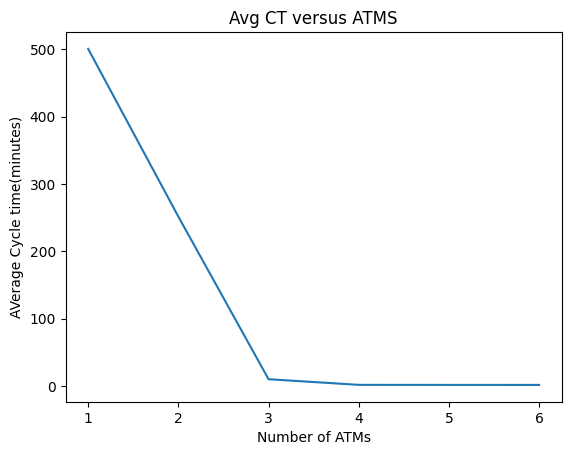

In [6]:
import matplotlib.pyplot as plt
plt.plot(num_atms,ct_atms)
plt.title(f'Avg CT versus ATMS')
plt.xlabel('Number of ATMs')
plt.ylabel('AVerage Cycle time(minutes)')
plt.show();

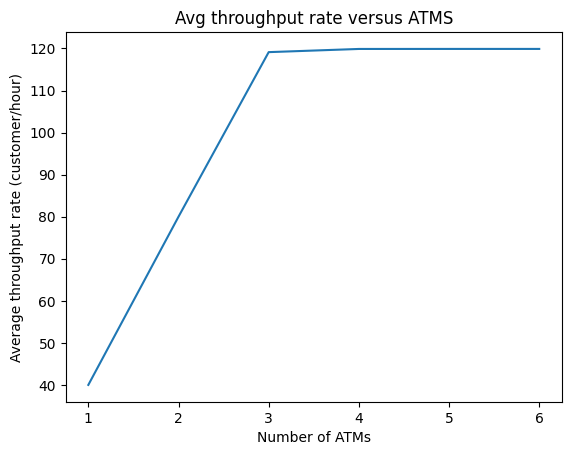

In [7]:
import matplotlib.pyplot as plt
plt.plot(num_atms,throughput_atms)
plt.title(f'Avg throughput rate versus ATMS')
plt.xlabel('Number of ATMs')
plt.ylabel('Average throughput rate (customer/hour)')
plt.show();